# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [311]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [313]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list

    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


638


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [314]:
print('Beginning Data Retrieval')
print('---------------------------')
counter = 0
for city in cities:
    print(f'Processing Record {counter} of set 1 | {city}')
    counter = counter + 1

Beginning Data Retrieval
---------------------------
Processing Record 0 of set 1 | hede
Processing Record 1 of set 1 | tacna
Processing Record 2 of set 1 | hilo
Processing Record 3 of set 1 | gerash
Processing Record 4 of set 1 | kasaragod
Processing Record 5 of set 1 | qaanaaq
Processing Record 6 of set 1 | illoqqortoormiut
Processing Record 7 of set 1 | conceicao do araguaia
Processing Record 8 of set 1 | srednekolymsk
Processing Record 9 of set 1 | mataura
Processing Record 10 of set 1 | ushuaia
Processing Record 11 of set 1 | rikitea
Processing Record 12 of set 1 | khatanga
Processing Record 13 of set 1 | nouakchott
Processing Record 14 of set 1 | tuktoyaktuk
Processing Record 15 of set 1 | sibolga
Processing Record 16 of set 1 | balikpapan
Processing Record 17 of set 1 | torbay
Processing Record 18 of set 1 | tsihombe
Processing Record 19 of set 1 | castro
Processing Record 20 of set 1 | ler
Processing Record 21 of set 1 | yar-sale
Processing Record 22 of set 1 | meru
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [157]:
# # Save config information.
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"

# # Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q="
# query_url
# target_city = 'phoenix'

# data = requests.get(query_url + target_city).json()
# print(query_url + target_city)

# data['coord']['lon']
# data['coord']['lat']
# data['main']['temp_max']
# data['main']['humidity']
# data['clouds']['all']
# data['wind']['speed']
# data['main']['temp_max']
# data['dt']
# data['sys']['country']
# data['name']
# # 

In [315]:
city1 = []
Lat = []
Long = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date1 = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city1.append(response['name'])
        Lat.append(response['coord']['lat'])
        Long.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date1.append(response['dt'])
    except KeyError:
        print(f'Skipped City: {city}')

print(len(city1))
print(len(Lat))
print(len(Long))
print(len(maxtemp))
print(len(humidity))
print(len(cloudiness))
print(len(windspeed))
print(len(country))
print(len(date1))

### Creating a Datafram 
df = pd.DataFrame({'City': city1,
                   'Lat' : Lat,
                   'Lng' : Long,
                   'Max Temp': maxtemp,
                   'Humidity':humidity,
                   'Cloudiness':cloudiness,
                   'Wind Speed': windspeed,
                   'Country' : country,
                   'Date': date1
                  })




Skipped City: illoqqortoormiut
Skipped City: tsihombe
Skipped City: marcona
Skipped City: vaitupu
Skipped City: jhikargachha
Skipped City: ziyamet
Skipped City: taolanaro
Skipped City: keshan
Skipped City: mys shmidta
Skipped City: grand centre
Skipped City: barentsburg
Skipped City: umzimvubu
Skipped City: maloshuyka
Skipped City: formoso do araguaia
Skipped City: toliary
Skipped City: samusu
Skipped City: bur gabo
Skipped City: sentyabrskiy
Skipped City: attawapiskat
Skipped City: viligili
Skipped City: belushya guba
Skipped City: stoyba
Skipped City: play cu
Skipped City: temaraia
Skipped City: tumannyy
Skipped City: satitoa
Skipped City: sedelnikovo
Skipped City: masjed-e soleyman
Skipped City: cheuskiny
Skipped City: amderma
Skipped City: nizhneyansk
Skipped City: kamenskoye
Skipped City: saleaula
Skipped City: dekoa
Skipped City: lolua
Skipped City: juifang
Skipped City: mrirt
Skipped City: grand river south east
Skipped City: solovetskiy
Skipped City: karamea
Skipped City: malwa

In [316]:
# Export the city data into a .csv.
# Display the DataFrame

df.to_csv('cities_t.csv', index=False)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hede,33.7681,120.2517,63.27,23,0,15.97,CN,1618640133
1,Tacna,-18.0056,-70.2483,62.60,72,0,8.05,PE,1618640103
2,Hilo,19.7297,-155.0900,73.40,68,90,6.91,US,1618639577
3,Gerāsh,27.6652,54.1371,75.20,19,0,4.61,IR,1618639871
4,Kāsaragod,12.5000,75.0000,89.60,55,20,4.61,IN,1618640134


In [317]:
# Describe
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,19.838316,17.986303,59.783033,68.686308,54.400347,7.922877,1.618640e+09
std,33.118755,91.802990,21.210915,22.944613,37.581036,5.659460,1.128486e+02
min,-54.800000,-179.166700,-12.260000,6.000000,0.000000,0.490000,1.618640e+09
25%,-8.257800,-63.903900,45.000000,58.000000,19.000000,3.440000,1.618640e+09
50%,24.900000,22.636700,62.600000,74.000000,64.000000,6.690000,1.618640e+09
75%,46.783300,102.140800,75.990000,85.000000,90.000000,10.920000,1.618640e+09
max,78.218600,179.316700,101.880000,100.000000,100.000000,35.790000,1.618640e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [318]:
# Since the Max of Humidity is 100, No Humidity greater than 100 So this step Skipped
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,19.838316,17.986303,59.783033,68.686308,54.400347,7.922877,1.618640e+09
std,33.118755,91.802990,21.210915,22.944613,37.581036,5.659460,1.128486e+02
min,-54.800000,-179.166700,-12.260000,6.000000,0.000000,0.490000,1.618640e+09
25%,-8.257800,-63.903900,45.000000,58.000000,19.000000,3.440000,1.618640e+09
50%,24.900000,22.636700,62.600000,74.000000,64.000000,6.690000,1.618640e+09
75%,46.783300,102.140800,75.990000,85.000000,90.000000,10.920000,1.618640e+09
max,78.218600,179.316700,101.880000,100.000000,100.000000,35.790000,1.618640e+09


In [319]:
#  Get the indices of cities that have humidity over 100%.


In [320]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hede,33.7681,120.2517,63.27,23,0,15.97,CN,1618640133
1,Tacna,-18.0056,-70.2483,62.60,72,0,8.05,PE,1618640103
2,Hilo,19.7297,-155.0900,73.40,68,90,6.91,US,1618639577
3,Gerāsh,27.6652,54.1371,75.20,19,0,4.61,IR,1618639871
4,Kāsaragod,12.5000,75.0000,89.60,55,20,4.61,IN,1618640134
...,...,...,...,...,...,...,...,...,...
572,Myitkyina,25.3833,97.4000,96.91,23,91,1.45,MM,1618640294
573,Agropoli,40.3469,14.9966,53.01,63,100,8.01,IT,1618640325
574,Cairns,-16.9167,145.7667,88.00,58,90,12.66,AU,1618640325
575,Esim,4.8699,-2.2405,78.84,82,86,4.21,GH,1618640325


In [321]:
###  Converting the Unix date format to yyyy-mm-dd and then spliting the column to separate date and time
clean_city_data['Date'] = pd.to_datetime(clean_city_data['Date']).astype(str)
# clean_city_data
clean_city_data[['dte', 'Time']] = clean_city_data['Date'].str.split(' ', n=1, expand=True)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,dte,Time
0,Hede,33.7681,120.2517,63.27,23,0,15.97,CN,1970-01-01 00:00:01.618640133,1970-01-01,00:00:01.618640133
1,Tacna,-18.0056,-70.2483,62.60,72,0,8.05,PE,1970-01-01 00:00:01.618640103,1970-01-01,00:00:01.618640103
2,Hilo,19.7297,-155.0900,73.40,68,90,6.91,US,1970-01-01 00:00:01.618639577,1970-01-01,00:00:01.618639577
3,Gerāsh,27.6652,54.1371,75.20,19,0,4.61,IR,1970-01-01 00:00:01.618639871,1970-01-01,00:00:01.618639871
4,Kāsaragod,12.5000,75.0000,89.60,55,20,4.61,IN,1970-01-01 00:00:01.618640134,1970-01-01,00:00:01.618640134
...,...,...,...,...,...,...,...,...,...,...,...
572,Myitkyina,25.3833,97.4000,96.91,23,91,1.45,MM,1970-01-01 00:00:01.618640294,1970-01-01,00:00:01.618640294
573,Agropoli,40.3469,14.9966,53.01,63,100,8.01,IT,1970-01-01 00:00:01.618640325,1970-01-01,00:00:01.618640325
574,Cairns,-16.9167,145.7667,88.00,58,90,12.66,AU,1970-01-01 00:00:01.618640325,1970-01-01,00:00:01.618640325
575,Esim,4.8699,-2.2405,78.84,82,86,4.21,GH,1970-01-01 00:00:01.618640325,1970-01-01,00:00:01.618640325


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

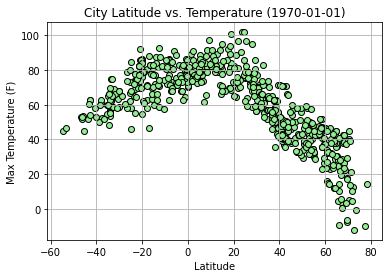

In [322]:
dte1 = clean_city_data.iloc[0]['dte']
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Temperature ({dte1})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

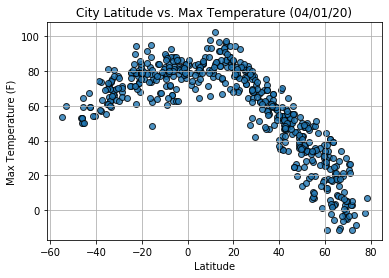

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

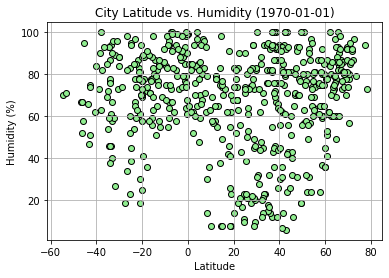

In [325]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Humidity ({dte1})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

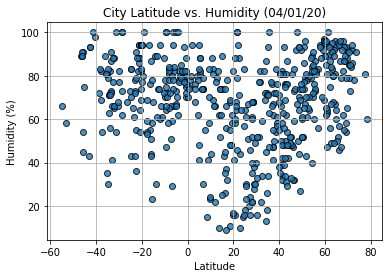

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

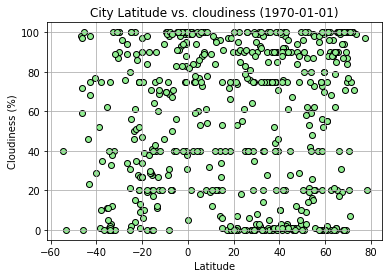

In [326]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. cloudiness ({dte1})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

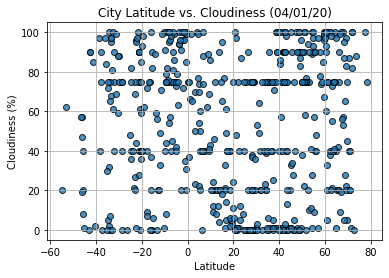

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (%)')

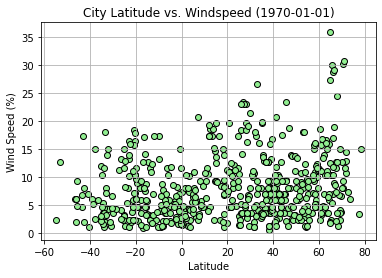

In [327]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Windspeed ({dte1})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')

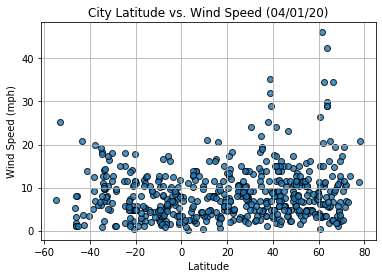

## Linear Regression

In [330]:
city_data_NH = clean_city_data[clean_city_data['Lat'] > 0]
city_data_NH

city_data_SH = clean_city_data[clean_city_data['Lat'] < 0]
city_data_SH

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,dte,Time
1,Tacna,-18.0056,-70.2483,62.60,72,0,8.05,PE,1970-01-01 00:00:01.618640103,1970-01-01,00:00:01.618640103
6,Conceição do Araguaia,-8.2578,-49.2647,77.00,94,0,1.14,BR,1970-01-01 00:00:01.618640135,1970-01-01,00:00:01.618640135
8,Mataura,-46.1927,168.8643,53.01,67,72,5.99,NZ,1970-01-01 00:00:01.618640136,1970-01-01,00:00:01.618640136
9,Ushuaia,-54.8000,-68.3000,44.60,70,40,2.30,AR,1970-01-01 00:00:01.618639852,1970-01-01,00:00:01.618639852
10,Rikitea,-23.1203,-134.9692,77.77,67,100,10.16,PF,1970-01-01 00:00:01.618639851,1970-01-01,00:00:01.618639851
...,...,...,...,...,...,...,...,...,...,...,...
559,Poya,-21.3500,165.1500,77.18,81,52,10.96,NC,1970-01-01 00:00:01.618640320,1970-01-01,00:00:01.618640320
560,Mwene-Ditu,-7.0000,23.4500,67.87,91,67,5.17,CD,1970-01-01 00:00:01.618640320,1970-01-01,00:00:01.618640320
563,Oxapampa,-10.5775,-75.4017,57.61,92,94,3.67,PE,1970-01-01 00:00:01.618640321,1970-01-01,00:00:01.618640321
567,Saint-Joseph,-21.3667,55.6167,82.40,78,75,2.30,RE,1970-01-01 00:00:01.618640323,1970-01-01,00:00:01.618640323


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Max temp and Latitude is -0.8738
The r-squared is: 0.7635582823815593


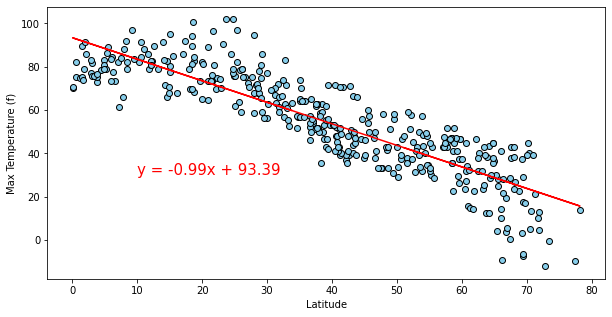

In [331]:

lati_NH = city_data_NH['Lat']
maxtemp_NH = city_data_NH['Max Temp']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, maxtemp_NH)
print(f'The correlation betwwen Northern Hemisphere Max temp and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, maxtemp_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, maxtemp_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(10,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.46937863826630627


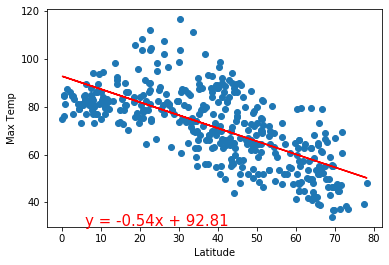

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Max temp and Latitude is 0.6446
The r-squared is: 0.41555547428284634


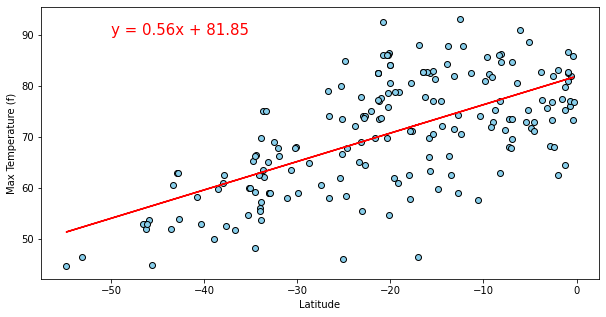

In [332]:
 
lati_SH = city_data_SH['Lat']
maxtemp_SH = city_data_SH['Max Temp']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, maxtemp_SH)
print(f'The correlation betwwen Southern Hemisphere Max temp and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, maxtemp_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, maxtemp_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,90),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.6082708688906918


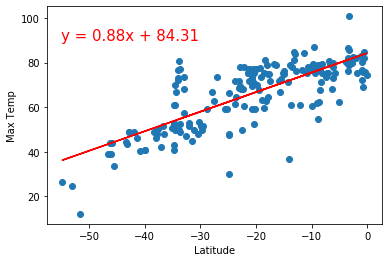

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Humidity and Latitude is 0.1809
The r-squared is: 0.03272665597983694


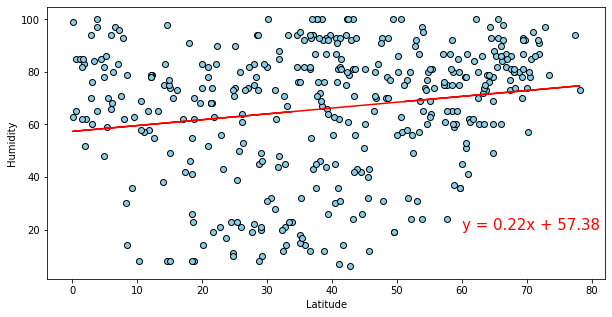

In [333]:

lati_NH = city_data_NH['Lat']
hum_NH = city_data_NH['Humidity']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, hum_NH)
print(f'The correlation betwwen Northern Hemisphere Humidity and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, hum_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, hum_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(60,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.000543987878808455


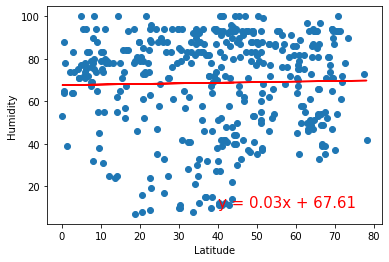

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Humidity and Latitude is 0.2595
The r-squared is: 0.06736091796328239


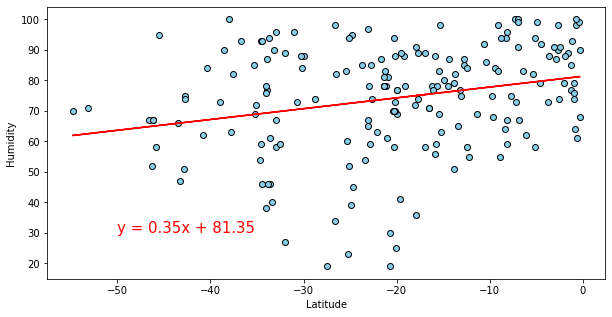

In [334]:
 
lati_SH = city_data_SH['Lat']
hum_SH = city_data_SH['Humidity']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, hum_SH)
print(f'The correlation betwwen Southern Hemisphere Humidity and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, hum_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, hum_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity ')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.014985174297345524


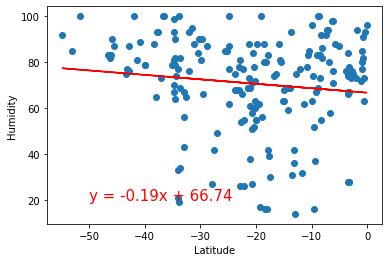

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Cloudiness and Latitude is 0.0235
The r-squared is: 0.0005524445785402457


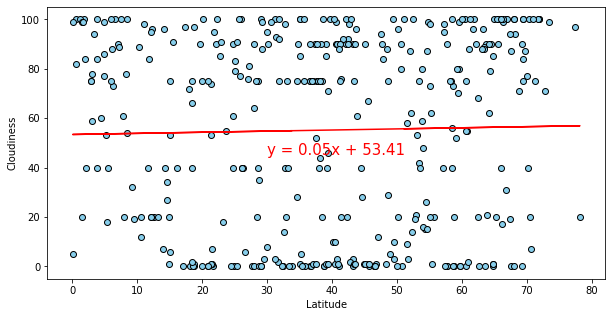

In [335]:

lati_NH = city_data_NH['Lat']
clo_NH = city_data_NH['Cloudiness']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, clo_NH)
print(f'The correlation betwwen Northern Hemisphere Cloudiness and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, clo_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, clo_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(30,45),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.0020898727664228514


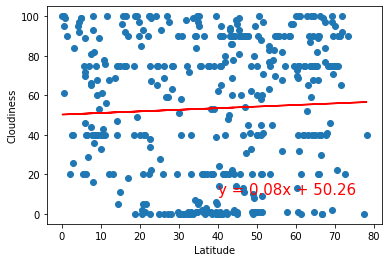

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Cloudiness and Latitude is 0.3009
The r-squared is: 0.090530555162479


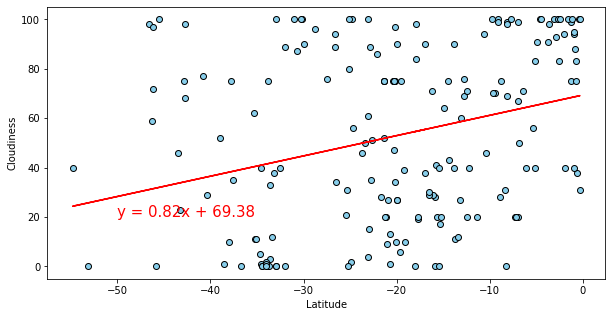

In [336]:
 
lati_SH = city_data_SH['Lat']
clo_SH = city_data_SH['Cloudiness']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, clo_SH)
print(f'The correlation betwwen Southern Hemisphere Cloudiness and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, clo_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, clo_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.0035263772085582894


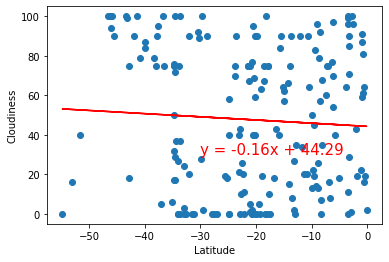

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Wind Speed and Latitude is 0.1321
The r-squared is: 0.017441836881553072


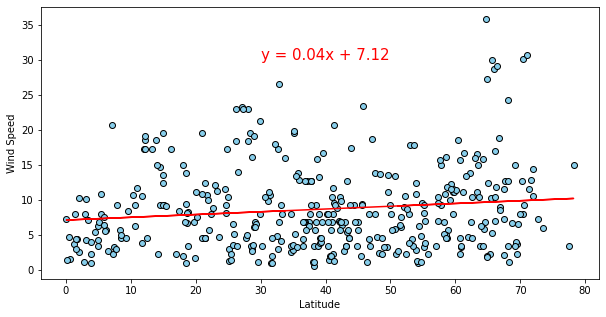

In [337]:

lati_NH = city_data_NH['Lat']
wind_NH = city_data_NH['Wind Speed']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, wind_NH)
print(f'The correlation betwwen Northern Hemisphere Wind Speed and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, wind_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, wind_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(30,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.04019723576144484


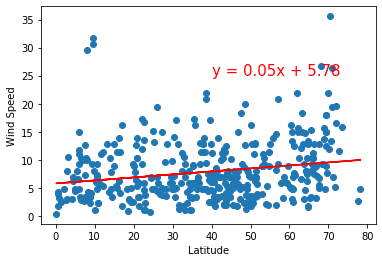

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Wind Speed and Latitude is -0.0692
The r-squared is: 0.004794684709839301


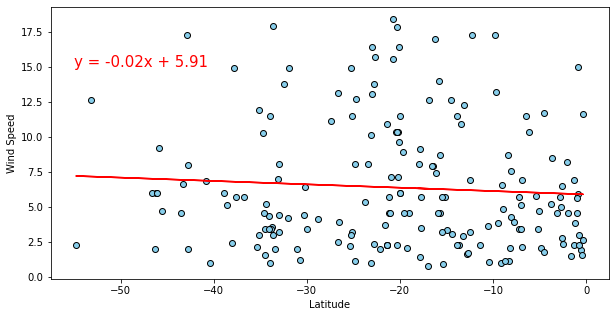

In [342]:

lati_SH = city_data_SH['Lat']
wind_SH = city_data_SH['Wind Speed']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, wind_SH)
print(f'The correlation betwwen Southern Hemisphere Wind Speed and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, wind_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, wind_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-55,15),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.017128274759839232


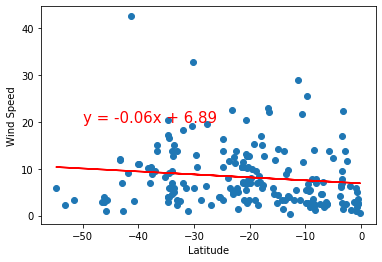